# 4. データの表現と特徴量エンジニアリング

* 連続値特徴量（continuous feature）の形でデータが得られないこともある
* カテゴリ特徴量（categorical feature）は離散値特徴量（discrete feature）とも呼ばれ、一般に数値ではない
* 連続値特徴量の例として、ピクセルの明るさ、花の大きさを測定した値などがある
* カテゴリ特徴量の例として、製品のブランドや色、販売されている部門（書籍、金物）などがある
* データを表現する特徴量のタイプによらず、特徴量の表現は機械学習モデルの性能に多大な影響を及ぼす
* 特定のアプリケーションに対して、最良のデータ表現を模索することを、特徴量エンジニアリング（fature engineering）と呼ぶ
* 教師あり学習では、データを正しく表現することは、パラメータを適切に選ぶことよりも、大きな影響を与えることもある

## 4.1 カテゴリ変数

### 4.1.1 ワンホットエンコーディング（ダミー変数）
* カテゴリ変数を表現する方法として、圧倒的によく用いられている手法が、ワンホットエンコーディング（one-hot-encoding もしくは one-out-of-N encoding）で、ダミー変数と呼ばれることもある
* ダミー変数とは、カテゴリ変数を一つ以上の0と1の値を持つ新しい特徴量で置き換えるもの
* 値０と１を使えば、線形２クラス分類の四季が意味を持つのでscikit-learnのほとんどのモデルを利用できる
* カテゴリごとに新しい特徴量を導入すれば、いくらでもカテゴリ変数を表現できる
* 例えば、workclass（雇用形態）特徴量が、"Goverment Employee","Private Employee","Self Employed","Self Employed Incorporated"の４つの値をとるとする
* これら４つの値をエンコードするには４つの新しい特徴量"Goverment Employee","Private Employee","Self Employed","Self Employed Incorporated"を作る
* これらの特徴量は、ある人物のworkclassが対応する値だったときに１になり、それ以外の場合には０になる
* カテゴリ変数をワンホットエンコーディングに変換するには、pandasを使う方法と、scikit-learnを使う方法がある

In [2]:
import pandas as pd
import os
import mglearn

# このファイルにはカラム名を含んだヘッダがないので、header=Noneを指定し、カラム名を""names"で明示的に指定
adult_path=os.path.join(mglearn.datasets.DATA_PATH,"adult.data")
data=pd.read_csv(
    adult_path,header=None,index_col=False,
    names=['age','workclass','fnlwgt','education','education-num',
        'marital-status','occupation','relationship','race','gender'
        ,'capital-gain','capital-loss','hours-per-week','native-country',
        'income'])
# 解説のためにいくつかのカラムだけ選択
data=data[['age','workclass','education','gender','hours-per-week','occupation','income']]
# IPython.displayを使うと、Jupyter notebookできれいな出力が得られる
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


#### 4.1.1.1 文字列で表されているカテゴリデータのチェック
* データセットを読み込んだら、各列に意味のある宛カテゴリデータが含まれているかチェックしたほうが良い
* 人間が入力したデータを処理する場合、固定したカテゴリがないこともあり、スペルの表記ゆれや大文字小文字の違いを前処理する必要がある（manとmaleなど）

In [3]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


* このデータはすでに整理されているが、実際のアプリケーションでは、全てのカラムの値を同様にテストする必要がある
* pandasでは、get_dummies関数を使って簡単にデータをワンホットエンコーディングすることができる
* get_dummies関数は自動的に（文字列などの）object型やカテゴリ型（pandas特有の概念）の行をすべて変換する

In [4]:
print('Original features:\n',list(data.columns),'\n')
data_dummies=pd.get_dummies(data)
print("Features after get_dummies:\n",list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

* 連続値特徴量のageとhours-per-weekは変更されておらず、カテゴリ特徴量は取りうる値ごとに一つの特徴量を持つように拡張されている

In [5]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


* ここでvalues属性を用いれば、data_dummies DataFrameをNumpy配列に変換し、それを使って機械学習モデルを学習させることができる
* モデルを学習させる前に、ターゲット変数（ここでは２つのincome列）を分離することを忘れないように注意（よくあるミス）

In [6]:
features=data_dummies.loc[:,'age':'occupation_ Transport-moving']
# Numpy配列を取り出す
X=features.values
y=data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape,y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print("Test score: {:.2f}".format(logreg.score(X_test,y_test)))

Test score: 0.81


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* カテゴリ値が訓練セットでもテストセットでも同じように表現されるように、テストデータと訓練データの双方が入ったDataFrameに対してget_dummiesを読んでいる（重要）

### 4.1.2 数値でエンコードされているカテゴリ
* カテゴリ変数が整数としてエンコードされている場合もある（「アンケートの２マス目にチェックは１、３マス目にチェックは2」など）
* こういった場合は、個々の数字は独立した状態を表しているため、連続値として扱ってはならない


In [13]:
# 整数特徴量とカテゴリ文字列特徴量からなるDataFrameを作る
demo_df=pd.DataFrame({'Integer Feature':[0,1,2,1],'Categorical Feature':['socks','fox','socks','box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [14]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


* get_dummiesを実行しても、整数特徴量は変化しない
* pandasのget_dummies関数では、全ての数値を連続値として扱い、ダミー変数を作らない
* これを回避するためには、scikit-learnのOneHotEncoderを用いるか、DataFrameの列を数値から文字列に変換してしまえば良い


In [ ]:
demo_df=pd.DataFrame({'Integer Feature':[0,1,2,1],'Categorical Feature':['socks','fox','socks','box']})
demo_df['Integer Feature']=demo_df['Integer Feature'].astype(str)   # 文字列に変換
pd.get_dummies(demo_df)

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


In [17]:
demo_df=pd.DataFrame({'Integer Feature':[0,1,2,1],'Categorical Feature':['socks','fox','socks','box']})
pd.get_dummies(demo_df,columns=['Integer Feature','Categorical Feature'])   # columnsパラメータで明示的に指定してもカテゴリカル変数にできる

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## 4.2 ビニング、離散化、線形モデル、決定木
* 最良のデータ表現方法は、データの意味だけでなく、利用する機械学習モデルにも依存する
* 非常に広く利用されている、線形モデルと決定木ベースのモデル（決定木、勾配ブースティング木、ランダムフォレスト）は特徴量の表現の相違に関しては非常に異なる特性を持つ

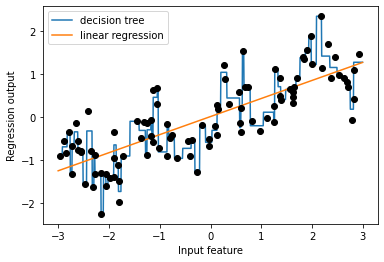

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

X,y=mglearn.datasets.make_wave(n_samples=100)
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

reg=DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line,reg.predict(line),label='decision tree')

reg=LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),label='linear regression')

plt.plot(X[:,0],y,marker='o',c='k',linestyle='none')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

* 線形モデルを連続データに対してより強力にする方法の一つとして、特徴量のビニング（binning）もしくは離散化（discretization）がある
* 特徴量の入力レンジ（ここでは−３から３）を固定数のビンに分割することを考える

In [22]:
bins=np.linspace(-3,3,11)
print('bins: {}'.format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


* 次に、個々のデータポイントがどのビンに入るかを記録する

In [23]:
which_bin=np.digitize(X,bins=bins)
print("\nData points:\n",X[:5])
print('\nBin membership for data points:\n',which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


* waveデータセットの単一の連続値特徴量を、どのビンにデータポイントが入っているかを表現したカテゴリ特徴量への置き換えを行った
* このデータにscikit-learnモデルを適用するには、この離散値特徴量をワンホットエンコーディングに変換する必要がある
* scikit-learnのpreprocessingモジュールのOneHotEncoderはpandasのget_dummiesと同じ機能を持つが、整数値のカテゴリ変数しか扱うことができない

In [24]:
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoderで変換する
encoder=OneHotEncoder(sparse=False)
# encoder.fitでwhich_binに現れる整数値のバリエーションを確認
encoder.fit(which_bin)
# transformでワンホットエンコーディングを行う
X_binned=encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


* 10ビンを指定したので、変換されたデータセットX_binnedには１０個の特徴量ができている

In [25]:
print(X_binned.shape)

(100, 10)


* 線形回帰モデルと決定木モデルをこのワンホットエンコーディングデータに対して作り直してみる

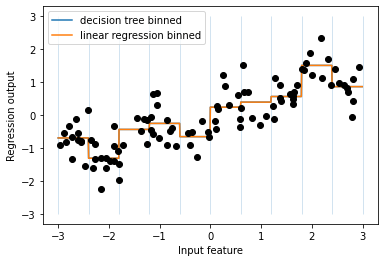

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

line_binned=encoder.transform(np.digitize(line,bins=bins))

reg=DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label='decision tree binned')

reg=LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label='linear regression binned')

plt.plot(X[:,0],y,marker='o',c='k',linestyle='none')
plt.vlines(bins,-3,3,linewidth=1,alpha=.2)
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

* ↑ビニング特徴量を用いた線形回帰と決定木の比較
* 線形回帰と決定木が完全に同じ予測を行っていることがわかる（線が重なっている）
* ビニングの前後でモデルが学習したことを比較すると、線形モデルに関してはより柔軟になっているが、決定木に関しては柔軟性が低下している
* 一般に、特徴量をビニングすることは、決定木にとってはメリットがない（もともと決定木はデータを任意の場所で分割して学習できるから）
* ビニングが最も有効な場合を、決定木は自動的に学習していると考えることもできる
* さらに、決定木は複数の特徴量を同時に扱えるが、ビニングは一つの特徴量ごとにしか行えない
* 線形モデルにおいては、この変換による表現力増大の効果は絶大
* あるデータセットに対してどうしても線形モデルを使いたい場合（データがとても大きくて高次元な場合など）、いくつかの特徴量が出力と非線形な関係を持つようなら、ビニングを使うとモデルの表現力を増強することができる

## 4.3 交互作用と多項式
* 特徴量表現をより豊かにする一つの方法として、特に線形モデルに有効なものが、元のデータの交互作用特徴量（interaction feature）と多項式特徴量（polynomial feature）を加える方法
* ビニングされた線形モデルに傾きを加える一つの方法は、元の特徴量（グラフのx軸）を加え直すことが挙げられる（10個のビンの場合、合計で11次元の特徴量にする）

In [30]:
X_combined=np.hstack([X,X_binned])
print(X_combined.shape)

(100, 11)


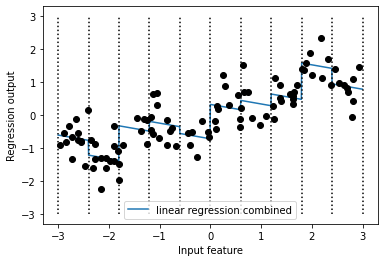

In [36]:
reg=LinearRegression().fit(X_combined,y)

line_combined=np.hstack([line,line_binned])
plt.plot(line,reg.predict(line_combined),label='linear regression combined')

for bin in bins:
    plt.plot([bin,bin],[-3,3],linestyle=':',c='k')
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.plot(X[:,0],y,marker='o',c='k',linestyle='none')

* このモデルは個々のビンに対してオフセットと傾きを学習するが、x軸は一つしかないので、傾きは一つしかない（すべてのビンで傾きが共有されている）
* それぞれのビンごとに傾きを学習させるには、データポイントがどのビンに入っているかを示す特徴量とx軸のどこにあるかを示す特徴量の交互作用もしくは積を、特徴量として加えれば良い

In [39]:
X_product=np.hstack([X_binned,X*X_binned])
print(X_product.shape)
print(X_product[0])

(100, 20)
[ 0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.75275929 -0.         -0.         -0.         -0.
 -0.         -0.        ]


* データセットの特徴量が20個になった（ビニングした特徴量10個に加えて、「対応するビンに元の特徴量（x軸の値）、他がすべて0」で表される特徴量10個を追加した）

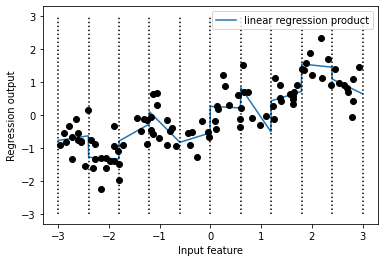

In [41]:
reg=LinearRegression().fit(X_product,y)

line_product=np.hstack([line_binned,line*line_binned])
plt.plot(line,reg.predict(line_product),label='linear regression product')

for bin in bins:
    plt.plot([bin,bin],[-3,3],linestyle=':',c='k')
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.plot(X[:,0],y,marker='o',c='k',linestyle='none')

* 個々のビンがそれぞれオフセットと傾きを持つようになった
* 連続値特徴量を拡張するもう一つの方法として、元の特徴量の多項式（polynomial）を使うことが挙げられる

In [42]:
from sklearn.preprocessing import PolynomialFeatures

# x**10までの多項式を加える
# デフォルトの"include_bias=True"だと、常に1となる特徴量を加える
poly=PolynomialFeatures(degree=10,include_bias=False)   # 10次を指定
poly.fit(X)
X_poly=poly.transform(X)
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [43]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


* 個々の特徴量の意味はget_feature_namesメソッドで知ることができる

In [44]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


* 多項式特徴量を線形回帰モデルと組み合わせると、古典的な多項式回帰（polynomial regression）モデルになる

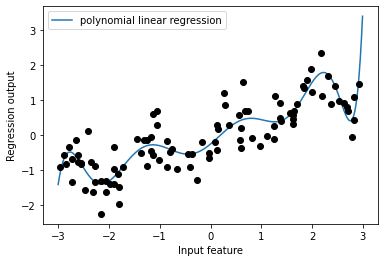

In [46]:
reg=LinearRegression().fit(X_poly,y)

line_poly=poly.transform(line)
plt.plot(line,reg.predict(line_poly),label='polynomial linear regression')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.plot(X[:,0],y,marker='o',c='k',linestyle='none')
plt.legend(loc='best')


* 多項式特徴量はこの1次元のデータに対して非常にスムーズに適合するが、高次の多項式は、境界近辺やデータが少ない領域で極端な振る舞いを示す傾向にある

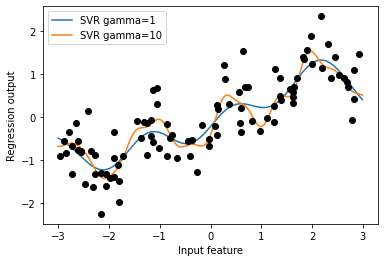

In [47]:
from sklearn.svm import SVR

for gamma in [1,10]:
    svr=SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line),label='SVR gamma={}'.format(gamma))
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.plot(X[:,0],y,marker='o',c='k',linestyle='none')
plt.legend(loc='best')

* より複雑なモデル（RBFカーネル法を用いたSVM）を使えば、特徴量に対して明示的な変換を行わなくても、多項式回帰と同じように複雑な予測をすることができる

In [48]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston=load_boston()
X_train,X_test,y_train,y_test=train_test_split(boston.data,boston.target,random_state=0)
# データのスケール変換
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 2次までの多項式特徴量と交互作用を抽出する
poly=PolynomialFeatures(degree=2).fit(X_train_scaled)   # 元の特徴量2つの積まで考慮
X_train_poly=poly.transform(X_train_scaled)
X_test_poly=poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [49]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [50]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train_scaled,y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled,y_test)))
ridge=Ridge().fit(X_train_poly,y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly,y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


* 交互作用特徴量と多項式特徴量はRidgeの性能を明らかに押し上げていることがわかる
* ただし、ランダムフォレストのような複雑なモデルを使う場合は話が変わってくる

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100).fit(X_train_scaled,y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled,y_test)))
rf=RandomForestRegressor(n_estimators=100).fit(X_train_poly,y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly,y_test)))

Score without interactions: 0.805
Score with interactions: 0.789


* 追加の特徴量がなくてもランダムフォレストはRidgeの性能を上回っている
* また、交互作用特徴量と多項式特徴量を入れると、性能がわずかに低下している

## 4.4 単変量非線形変換